c:\miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ap5R_2024-11-20_09-00-27_saline
ap5R_2024-11-21_09-21-32_ap5_ctb647
ap5R_2024-11-25_09-41-07
ap5R_2024-11-26_09-29-29_ap5_488
ap5R_2024-11-16_12-22-37
ap5R_2024-11-18_08-34-11
ap5R_2024-11-19_09-28-42
ap5R_2024-11-11_14-55-34
ap5R_2024-11-12_13-10-27
RESULT: ['Z:/projects/sequence_squad/revision_data/lars_recordings/ephys/ap5/ap5R_2024-11-20_09-00-27_saline\\Record Node 105']
SEGMENT:0
Record Node 105 is already processed. SKIPPING!
RESULT: ['Z:/projects/sequence_squad/revision_data/lars_recordings/ephys/ap5/ap5R_2024-11-21_09-21-32_ap5_ctb647\\Record Node 105']
SEGMENT:1
Record Node 105 is already processed. SKIPPING!
RESULT: ['Z:/projects/sequence_squad/revision_data/lars_recordings/ephys/ap5/ap5R_2024-11-25_09-41-07\\Record Node 105']
SEGMENT:2
Record Node 105 is already processed. SKIPPING!
RESULT: ['Z:/projects/sequence_squad/revision_data/lars_recordings/ephys/ap5/ap5R_2024-11-26_09-29-29_ap5_488\\Record Node 105']
SEGMENT:3
Record Node 105 is already processed. SKIPPING!
RESULT:

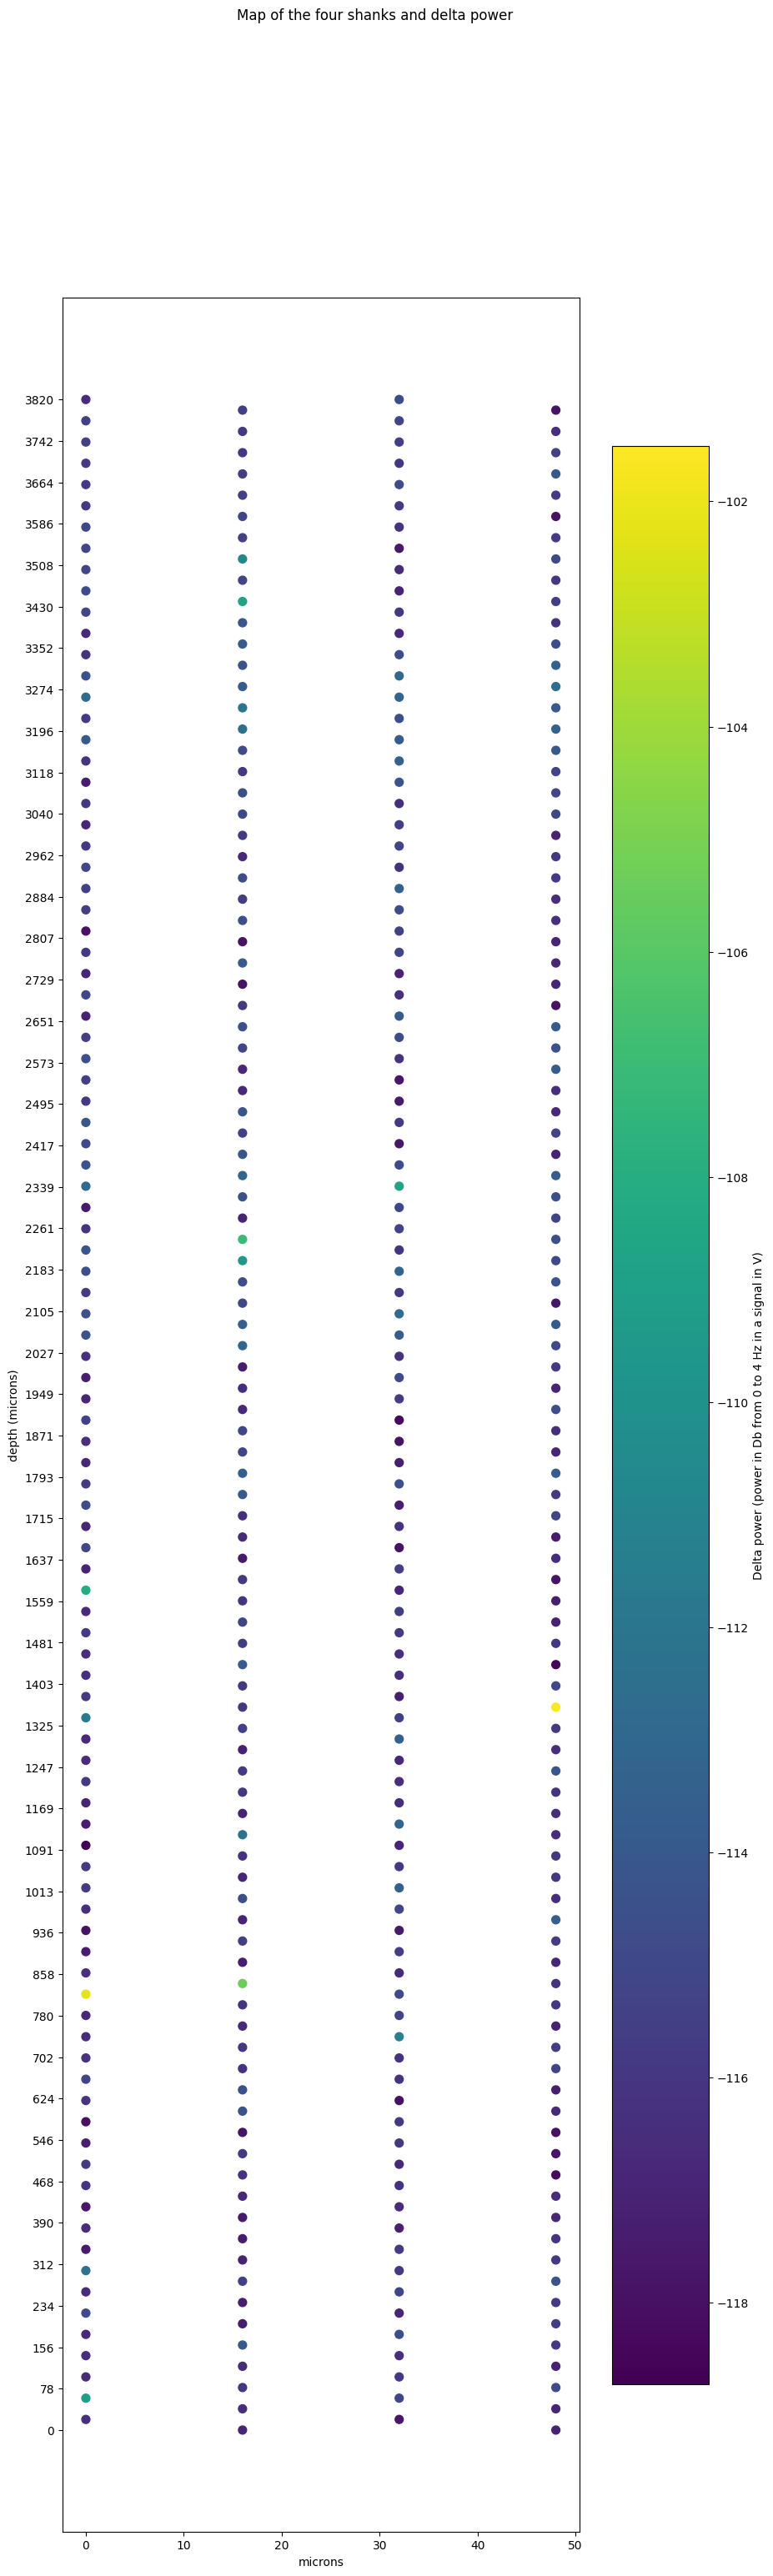

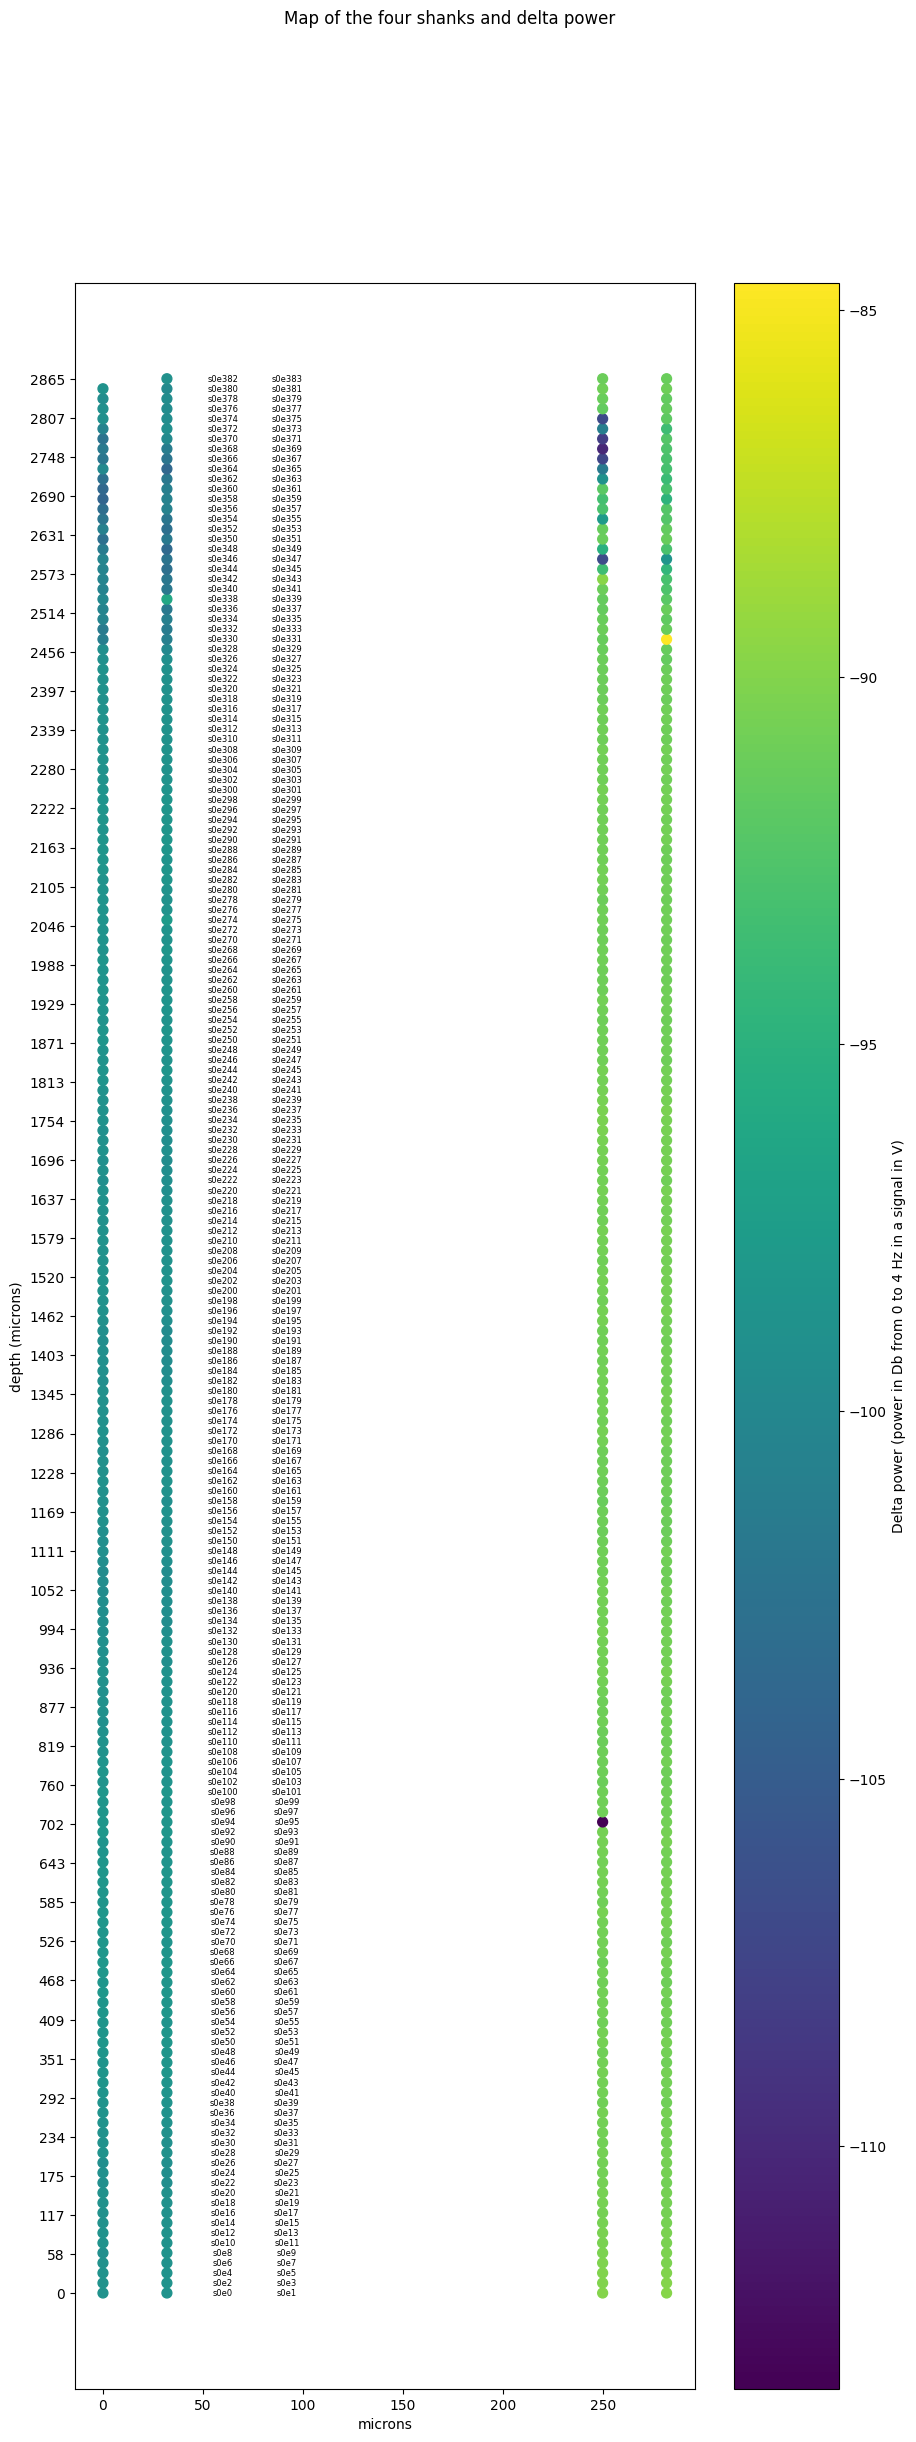

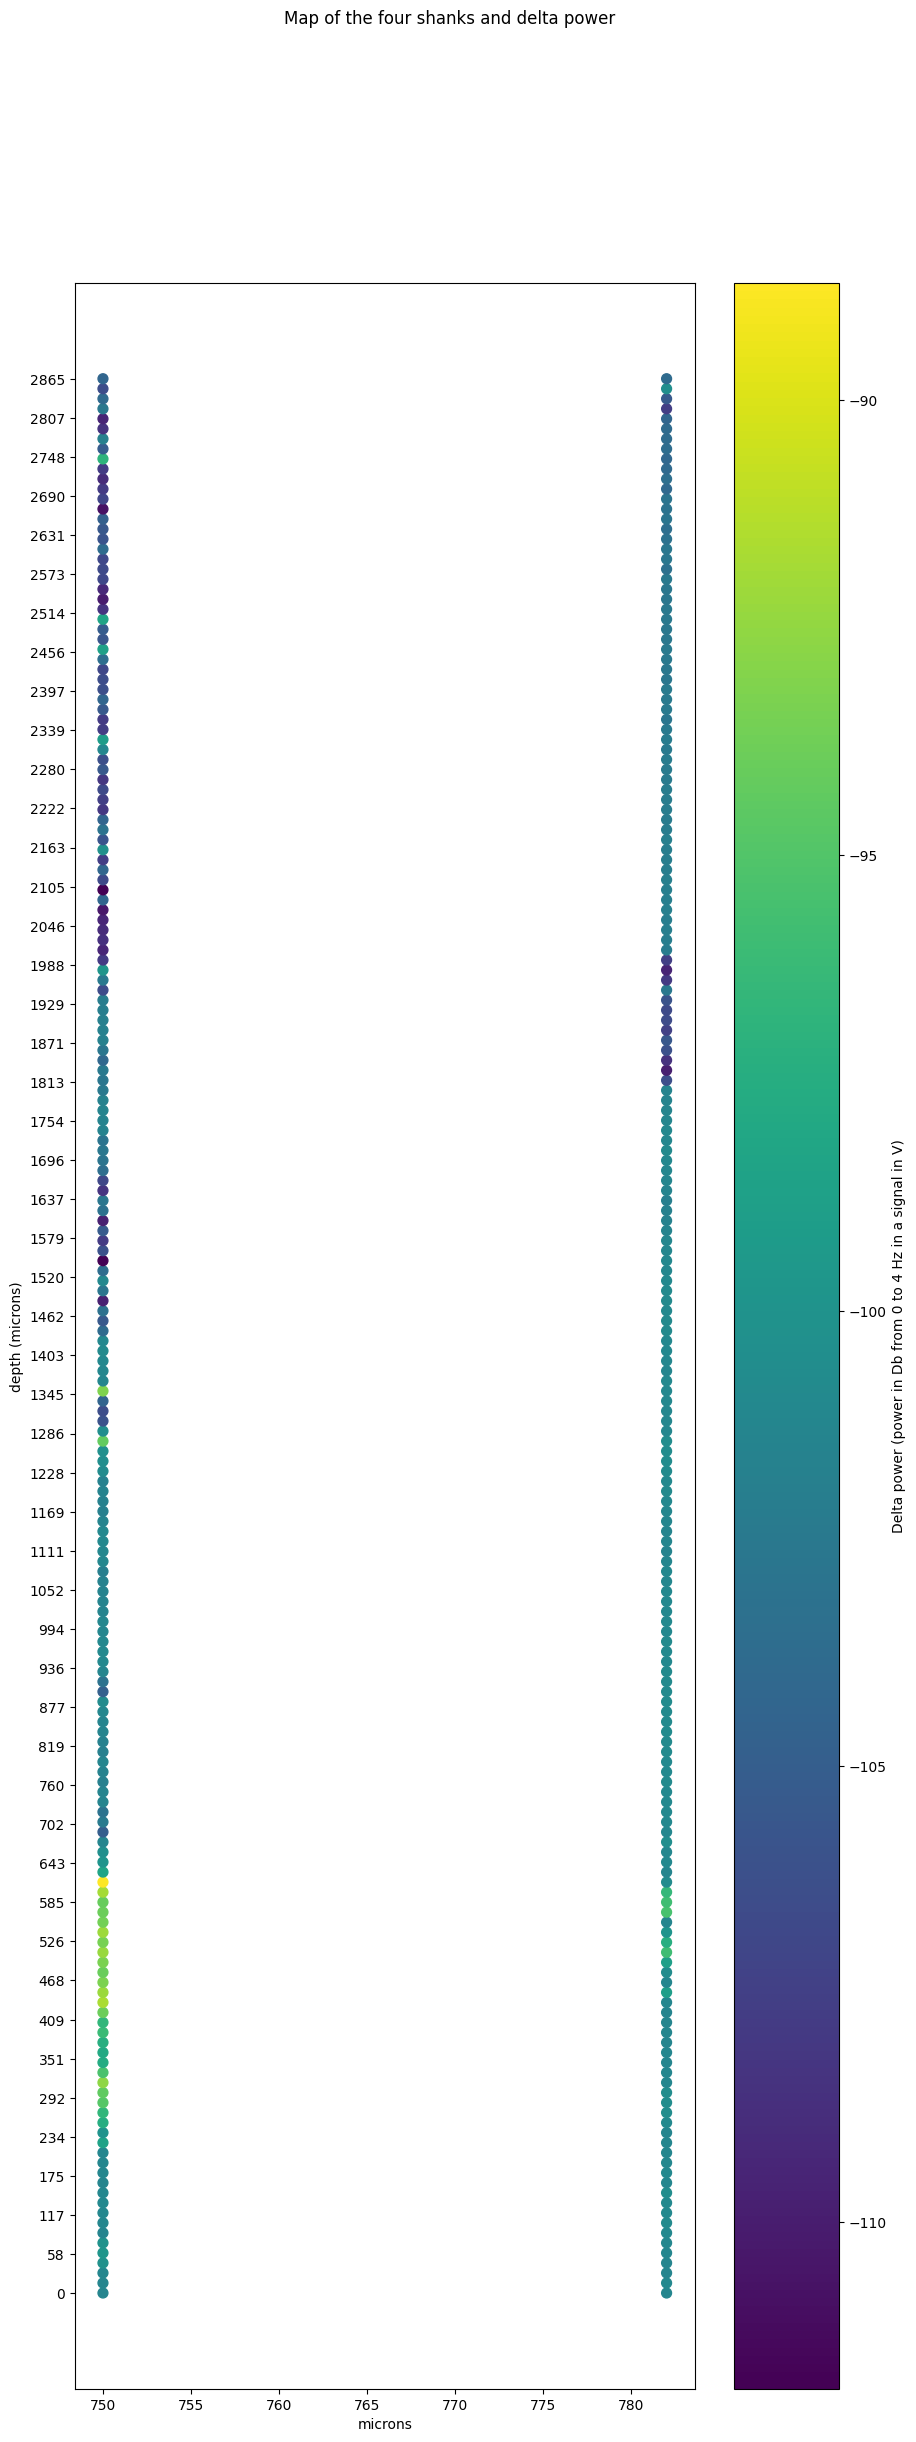

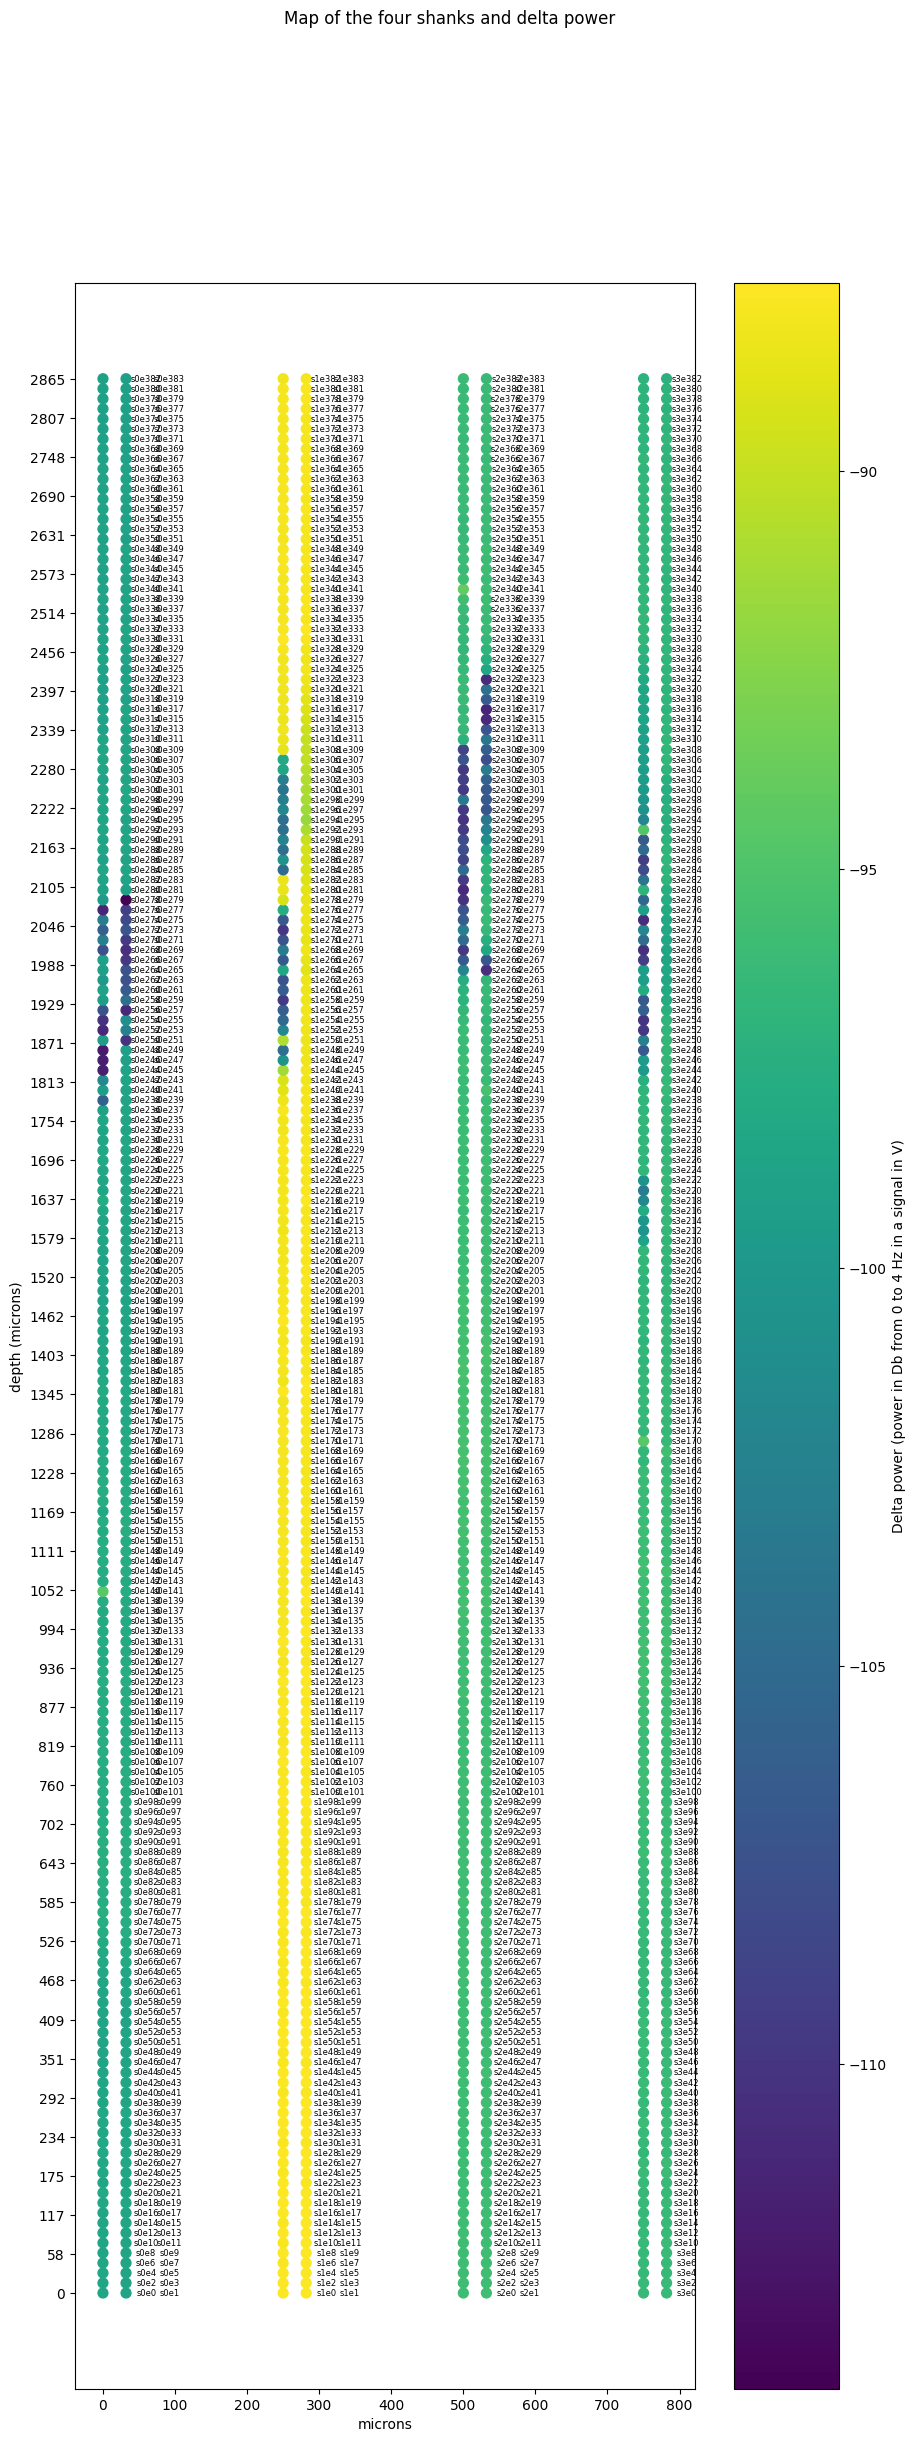

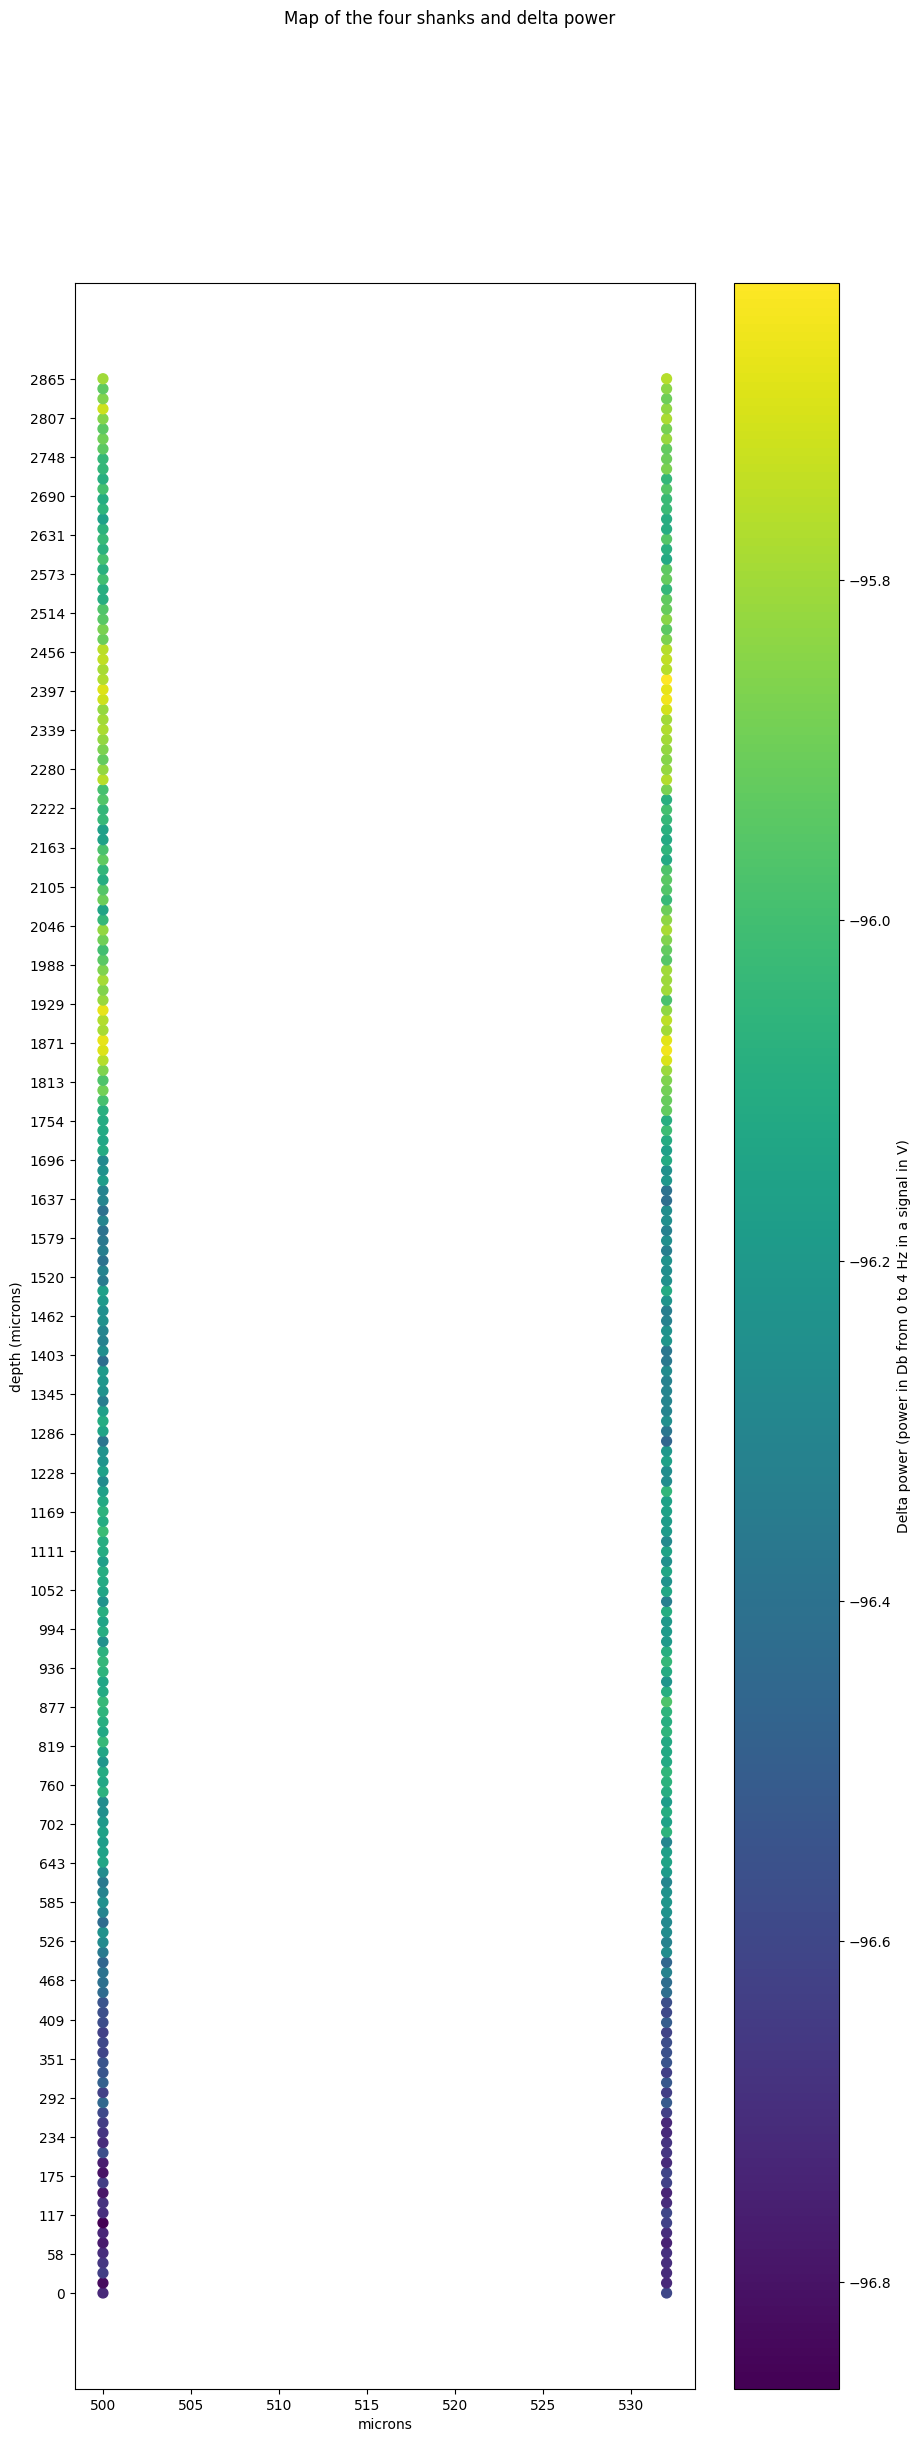

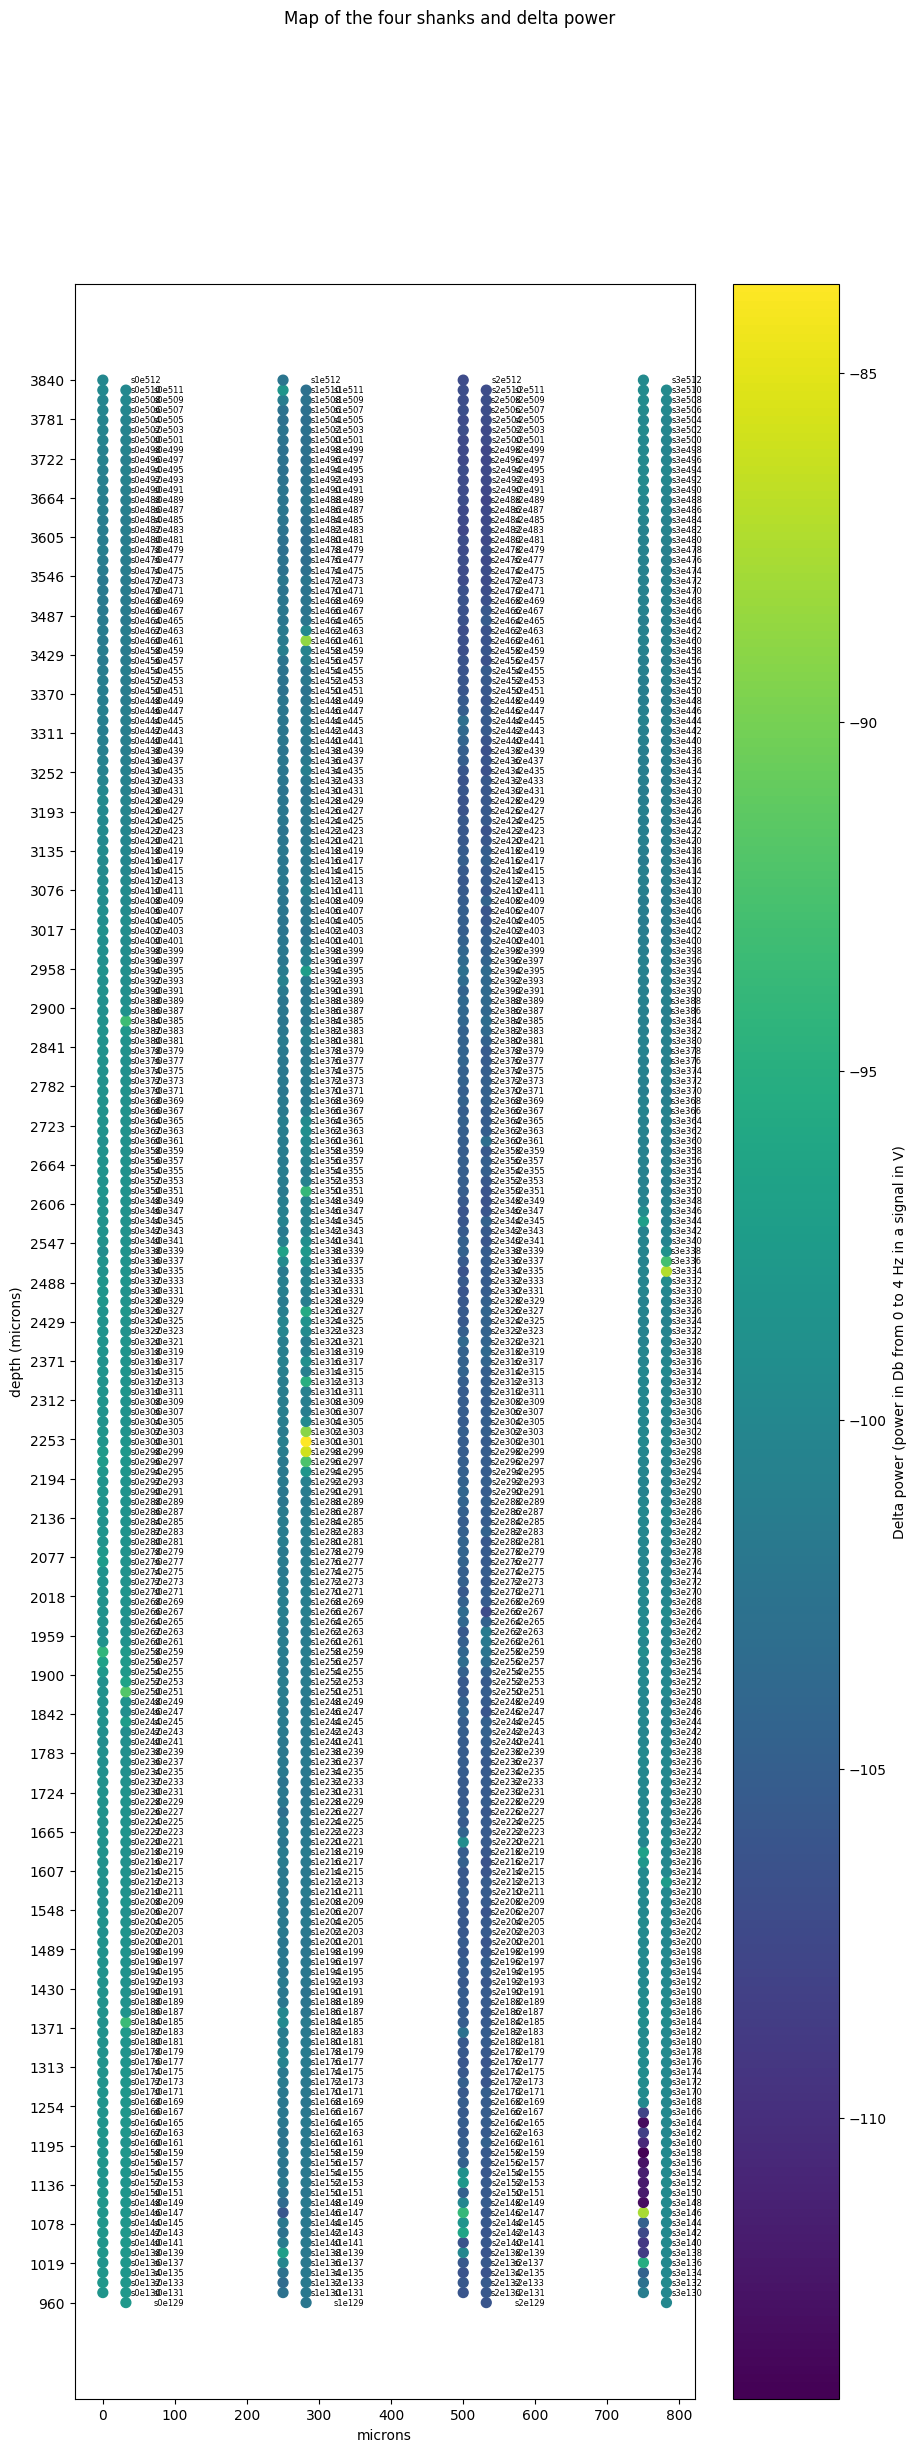

In [1]:
import probe_power_spectrum_pipeline.probe_location as probe_location
from pathlib import Path
import os


calculate_power = True
re_calculate_power = False
build_whole_probe = True

mode = 'four_shanks'


mouselist = ['ap5R', 'ap5L', 'ap5lr','seq006','seq007','seq008']

base_ephys_path = r'Z:/projects/sequence_squad/revision_data/lars_recordings/ephys/'
OUTPUT = Path(r'Z:/projects/sequence_squad/revision_data/organised_data/probe_power_spectra//')

if calculate_power:
    
    for mouse in mouselist:
        
        recording_paths  = []
        for sub_folder in os.listdir(base_ephys_path):
            os.listdir(os.path.join(base_ephys_path,sub_folder))
            for file_ in os.listdir(os.path.join(base_ephys_path,sub_folder)):
                if mouse in file_:
                    print(file_)
                    recording_paths += [os.path.join(base_ephys_path,sub_folder + r'/' + file_)]
                    
        for segment,raw_data_directory in enumerate(recording_paths):
            
            # List the directories directly under raw_data_directory
            for directory in next(os.walk(raw_data_directory))[1]:  # [1] gives the list of directories at the top level

                dir_path = os.path.join(raw_data_directory, directory)

                result = probe_location.get_record_node_path_list(dir_path)
                print(f'RESULT: {result}')

                print(f'SEGMENT:{segment}')
                

                output = Path(OUTPUT) / mouse /f'{directory}_{mode}_segment{segment}' 
                
                output_probemap = output / 'probemap.csv'

                if output_probemap.is_file() and not re_calculate_power:
                    print(f'{directory} is already processed. SKIPPING!')
                    
                else:

                    print('\n \n #################################')
                    print(f'Processing {mouse} session {directory}')
                    print('#################################\n \n ')

                    probe_mapper = probe_location.probe_mapper(mouse, directory,dir_path,output, mode=mode, segment = 0)

                    #Diagnostics plots

                    probe_mapper.fourier()
                    probe_mapper.plot_10s_traces()

                    #Calculate delta power

                    probe_mapper.probe_spectrum()
                    probe_mapper.calculate_delta_power()

                    #Output plots

                    probe_mapper.build_probemap()


if build_whole_probe:
    
    for mouse in mouselist:
        
        outpath = OUTPUT / Path(mouse)
        probe = probe_location.whole_probe(mouse,outpath)

        probe.build_whole_probemap()

        probe.process_probemap()

        probe.plot_probemap()